In [9]:
import os
import sys
import numpy as np
import multiprocessing
import threading
import time
import random as random
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [10]:
print("OS Name: ", sys.platform)

# check the number of cores
numberOfCores = multiprocessing.cpu_count()
print("Number of cores in the system: ", numberOfCores)


OS Name:  win32
Number of cores in the system:  8


In [11]:
# multiply two matrices
def multiply_matrices(mat1, mat2):
    return np.dot(mat1, mat2)

In [12]:
def matrix_multiplication_threading(num_of_matrices, size_matrix, main_matrix, results, lock_result):
    for _ in range(num_of_matrices):
        random_matrix = np.random.rand(*size_matrix)
        result = multiply_matrices(random_matrix, main_matrix)

        with lock_result:
            results.append(result)


In [13]:

def cal_time(num_of_threads):
    size_matrix = (1000, 1000)
    num_of_matrices = 100

    main_matrix = np.random.rand(*size_matrix)

    results = []
    lock_result = threading.Lock()

    threads = []

    matrices_per_thread = num_of_matrices // num_of_threads
    remaining_matrices = num_of_matrices % num_of_threads

    start_time = time.time()

    for _ in range(num_of_threads):
        if remaining_matrices > 0:
            num_of_matrices_this_thread = matrices_per_thread + 1
            remaining_matrices -= 1
        else:
            num_of_matrices_this_thread = matrices_per_thread

        thread = threading.Thread(
            target=matrix_multiplication_threading,
            args=(num_of_matrices_this_thread, size_matrix,
                  main_matrix, results, lock_result),
        )
        threads.append(thread)
        thread.start()

    # Wait for all threads to complete
    for thread in threads:
        thread.join()

    end_time = time.time()

    # Calculate total time taken
    total_time = end_time - start_time

    print(f"Number of results: {len(results)}")
    print(
        f"Total time taken with {num_of_threads} threads: {total_time:.4f} seconds")
    return total_time


In [14]:
num_of_threads = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                  12, 13, 14, 15, 16]
time_taken = []
for i in range(0, len(num_of_threads)):
    time_taken.append(cal_time(num_of_threads[i]))



Number of results: 100
Total time taken with 1 threads: 5.3180 seconds
Number of results: 100
Total time taken with 2 threads: 3.4723 seconds
Number of results: 100
Total time taken with 3 threads: 4.5518 seconds
Number of results: 100
Total time taken with 4 threads: 3.2617 seconds
Number of results: 100
Total time taken with 5 threads: 3.0175 seconds
Number of results: 100
Total time taken with 6 threads: 4.0722 seconds
Number of results: 100
Total time taken with 7 threads: 3.9337 seconds
Number of results: 100
Total time taken with 8 threads: 3.9218 seconds
Number of results: 100
Total time taken with 9 threads: 2.8314 seconds
Number of results: 100
Total time taken with 10 threads: 2.6345 seconds
Number of results: 100
Total time taken with 11 threads: 2.6292 seconds
Number of results: 100
Total time taken with 12 threads: 2.9074 seconds
Number of results: 100
Total time taken with 13 threads: 3.0877 seconds
Number of results: 100
Total time taken with 14 threads: 4.2908 seconds
N

In [15]:
time_taken

[5.318028688430786,
 3.4723334312438965,
 4.551849126815796,
 3.261657238006592,
 3.0174903869628906,
 4.072178840637207,
 3.9337470531463623,
 3.921766519546509,
 2.831439733505249,
 2.6345319747924805,
 2.629171133041382,
 2.9074196815490723,
 3.0876686573028564,
 4.290789604187012,
 3.4633002281188965,
 3.1576175689697266]

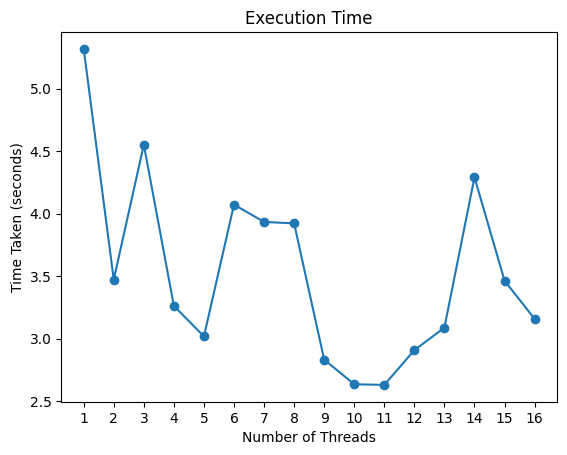

In [16]:
plt.plot(num_of_threads, time_taken, marker='o', linestyle='-')
plt.title('Execution Time')
plt.xlabel('Number of Threads')
plt.ylabel('Time Taken (seconds)')
plt.xticks(num_of_threads)
plt.show()